### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_palette("bright")

### Import Data

In [3]:
df = pd.read_csv("C:/Users/Catherine/projects/Capstone_Project_2/amazonalexareviews/amazon_alexa.tsv", sep="\t")

In [4]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### Exploring the Data
This dataset has five columns:
 - rating
 - date
 - variation
 - verified_reviews
 - feedback
 
We will explore each column with charts and see how it impacts our target column feedback.

In [5]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

The rating column has the following values:

In [6]:
df['rating'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

#### Converting the date attribute from string to datetime.time datatype

The date column will be used for feature engineering, so it would be helpful if we converted the column from a string datatype to a datetime.time datatype. 

In [7]:
type(df['date'][0]), df['date'][0]

(str, '31-Jul-18')

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['date'][0]

Timestamp('2018-07-31 00:00:00')

In [9]:
dates = df['date']
only_dates = []
for date in dates: 
    only_dates.append(date.date)

df['only_dates'] = only_dates
df['only_dates'][0]

<function Timestamp.date>

### Feature Engineering

#### Extracting Year, Month, Day of the Week from date.
   - We will be using these features later in the model
   - We will extract Month, Year, and Day of the Week into separate columns

In [10]:
only_year = []
for date in dates:
    only_year.append(date.year)
df['year'] = only_year


only_month = []
for date in dates:
    only_month.append(date.month)
df['month'] = only_month

# Day 1 -> Monday
# Day 7 -> Sunday
only_weekday = []
for date in dates:
    only_weekday.append(date.isoweekday())
df['day_of_week'] = only_weekday

#### Estimating the length of reviews
   - Calculating the length of text is an important feature for classifying text in a Natural Language Processing problem.

In [11]:
reviews = df['verified_reviews']
len_review = []
for review in reviews:
    len_review.append(len(review))
    
df['review_length'] = len_review

In [12]:
df['review_length'][0], df['verified_reviews'][0]

(13, 'Love my Echo!')

#### Updated Column List
   - As a result, we have added new columns to our dataset.

In [13]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback',
       'only_dates', 'year', 'month', 'day_of_week', 'review_length'],
      dtype='object')

### Data Visualization and Exploratory Data Analysis

- We can see that the number of 5 star rating reviews is high in this dataset.
- It seems that customers are very happy with their Alexa products.

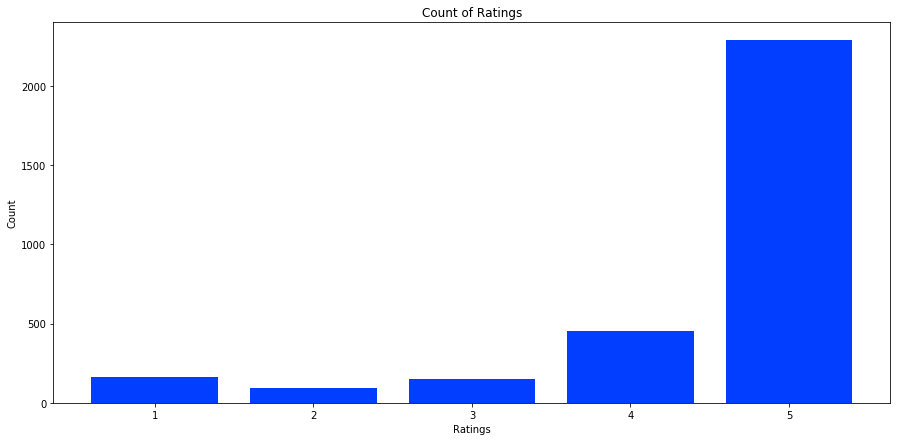

In [14]:
plt.figure(figsize=(15,7))
plt.bar(height = df.groupby('rating').count()['date'], x = sorted(df['rating'].unique(), reverse= False))
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Count of Ratings")
plt.show()                                                             

- On applying a hue of feedback, we see that reviews which have a rating more than 2 result in positive feedback (1).
- We will be removing this column from the training set, since we would prefer the learning algorithm not to capitalize on this feature. 

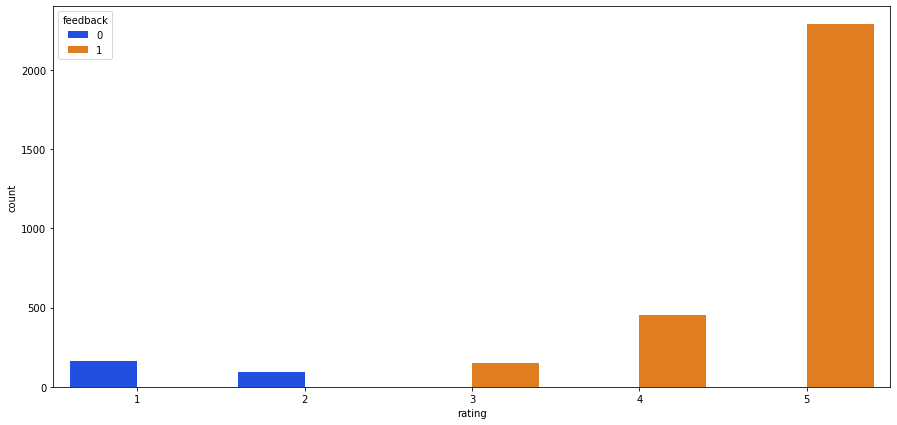

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(x='rating',hue='feedback',data=df)
plt.show()

- The bar plot of rating with variation shows that the Black Dot version is the most frequently ordered and most liked.

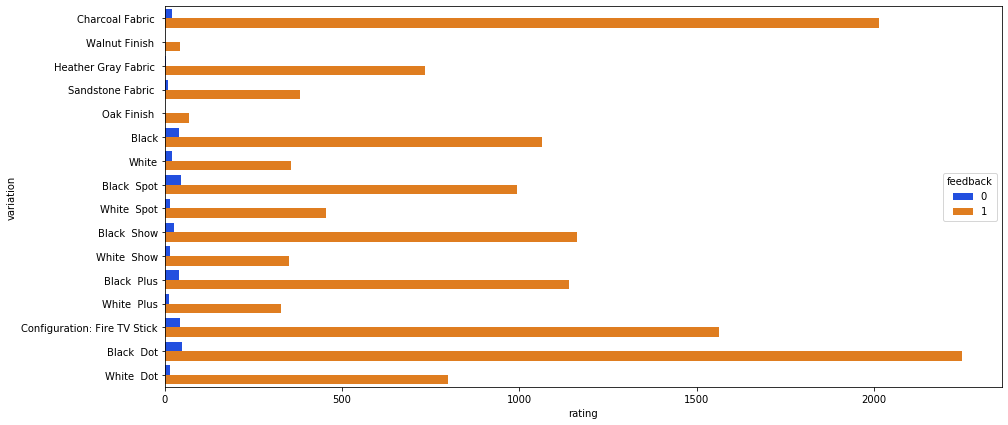

In [16]:
plt.figure(figsize=(15,7))
sns.barplot(x="rating", y="variation", hue="feedback", data=df, estimator= sum, ci = None)
plt.show()

- When changing the aggregation function to mean(default), the average rating seems to be 4.5 for each positive feedback review.

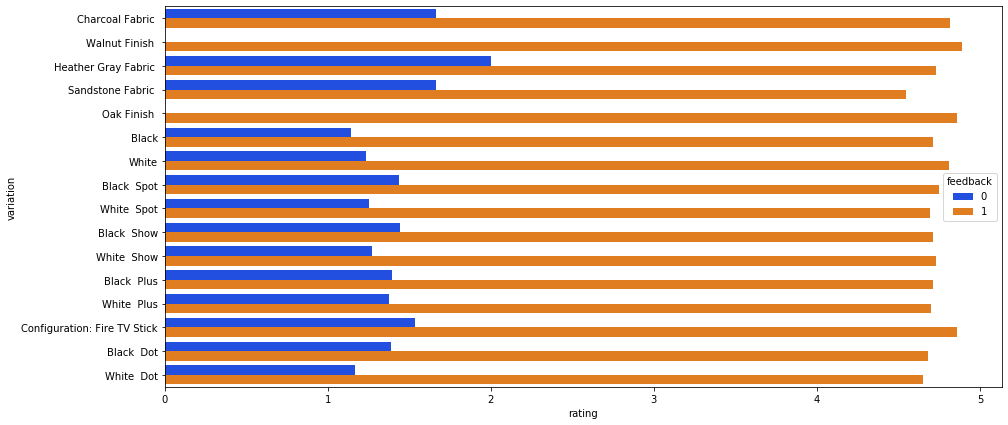

In [17]:
plt.figure(figsize=(15,7))
sns.barplot(x="rating", y="variation", hue="feedback", data=df, ci = None)
plt.show()

- When taking month into consideration, most orders in this dataset come from July.

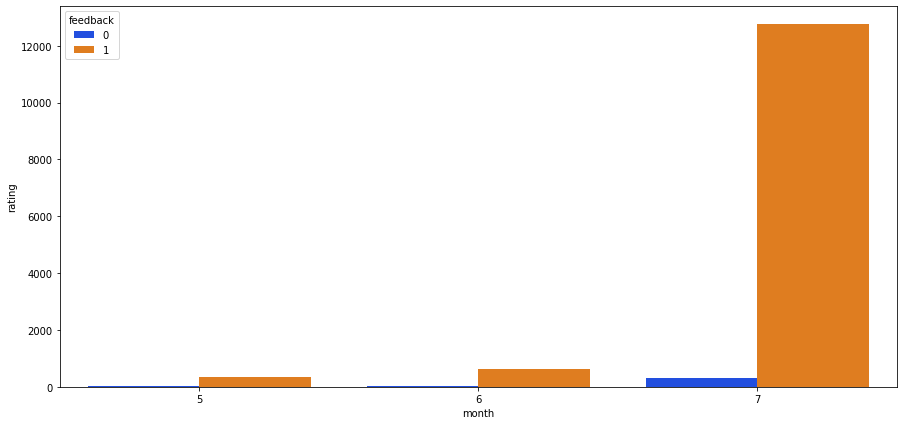

In [18]:
plt.figure(figsize=(15,7))
sns.barplot(y="rating", x="month", hue="feedback", data=df, ci = None, estimator= sum)
plt.show()

- Changing the average function to mean does not highlight anything important, just the fact that the products have high ratings.

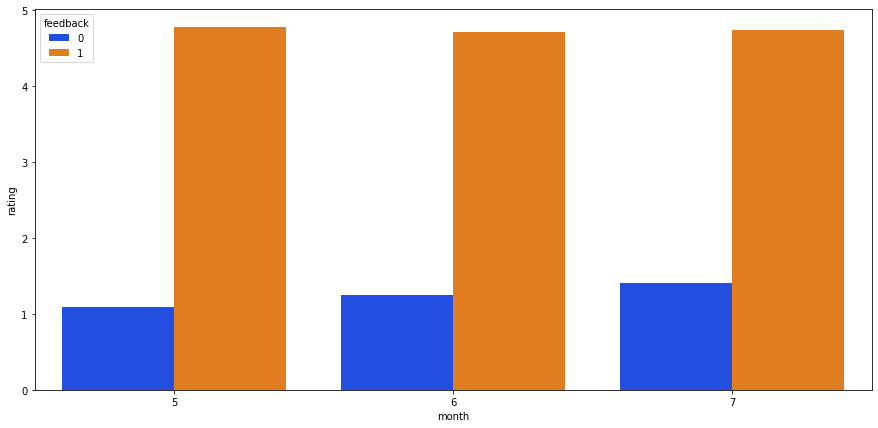

In [19]:
plt.figure(figsize=(15,7))
sns.barplot(y="rating", x="month", hue="feedback", data=df, ci = None)
plt.show()

- It seems that Monday is the day when most people write their reviews. 
- This can relate to the Prime delivery guarantee within two days, and that the most frequent day to order is on Saturday or the weekend.

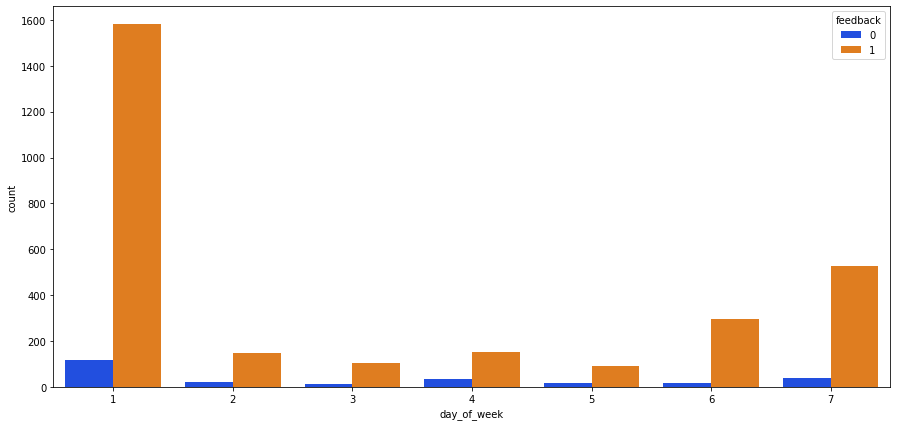

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(x="day_of_week", hue="feedback", data=df)
plt.show()

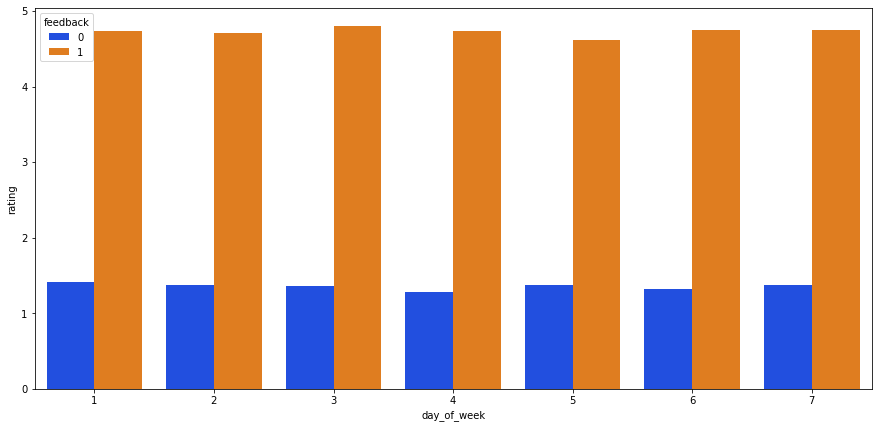

In [21]:
plt.figure(figsize=(15,7))
sns.barplot(y="rating", x="day_of_week", hue="feedback", data=df, ci = None)
plt.show()

- Overall this dataset imbalanced towards negative reviews.
- So, the important score to look at would be the F1 Score on how the model performed.

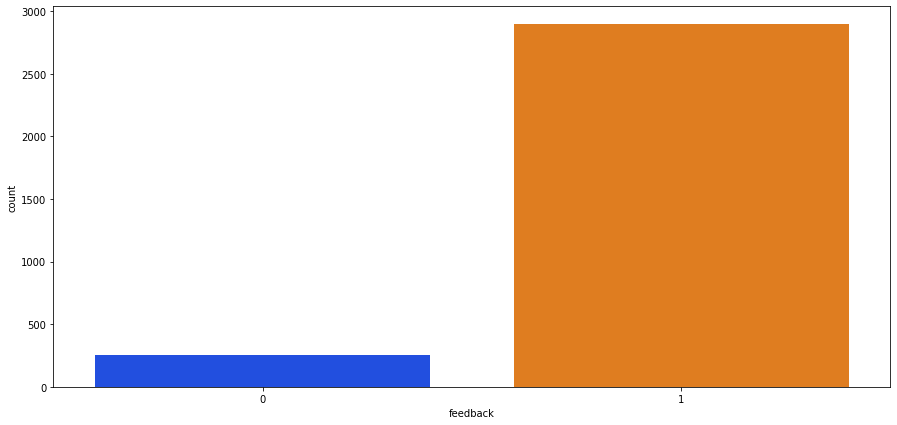

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(x="feedback", data=df)
plt.show()

- Finally the length column, which depicts that customers with negative review tend to write a longer review.

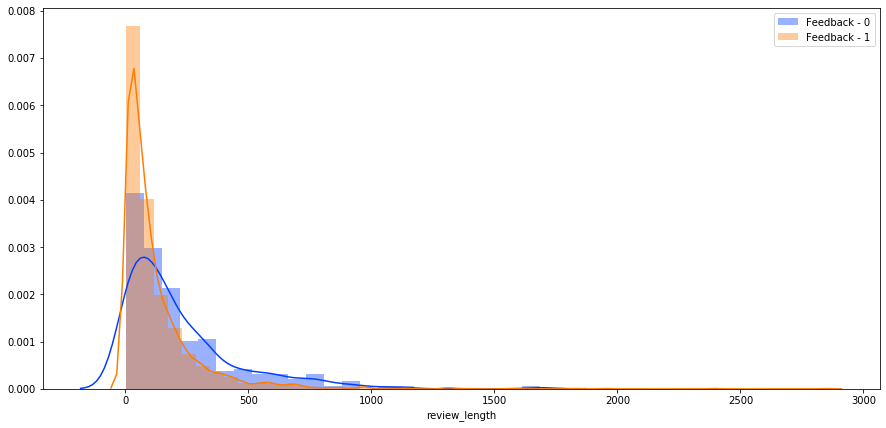

In [23]:
plt.figure(figsize=(15,7))
sns.distplot(df[df['feedback'] == 0]['review_length'], label = 'Feedback - 0')
sns.distplot(df[df['feedback'] == 1]['review_length'], label = 'Feedback - 1')
plt.legend()
plt.show()

### Data Preprocessing 

TfidfVectorizer: 
- Since we cannot directly insert text data into our machine learning models, we will have to use a vectorizer.
- The most vectorizer for any text data is Count-Vectorizer since it is easy to understand and relate to.
- For this dataset, we will use Term frequency inverse document frequency (TF-IDF).

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tdf = TfidfVectorizer(stop_words='english')

In [26]:
pd.DataFrame(tdf.fit_transform(df['verified_reviews']).toarray())

,0,1,2,3,4,5,6,7,8,9,...,3774,3775,3776,3777,3778,3779,3780,3781,3782,3783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.344989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
tdf_data = pd.DataFrame(tdf.fit_transform(df['verified_reviews']).toarray())

### One Hot Encoding

In [28]:
pd.get_dummies(df['variation'], drop_first= True)

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [29]:
one_hot_data = pd.get_dummies(df['variation'])

In [30]:
#Concatenate all the features we intend to use in a single dataframe called X
X = pd.concat([one_hot_data, tdf_data, df['month'], df['day_of_week'], df['review_length']], axis=1)

In [31]:
X.head()

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,3777,3778,3779,3780,3781,3782,3783,month,day_of_week,review_length
0,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,2,13
1,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,2,9
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,2,195
3,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,2,172
4,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,2,5


In [33]:
#The target vector y
y = df['feedback']

### K Fold Cross Validation: 

- K Fold Cross Validation gives us a good idea of how our selected model is performing on different chunks of data.
- We are getting perfect scores through cross validation, as a result we would not be performing hyper parameter tuning. 

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

rf = RandomForestClassifier()

k_fold = KFold(n_splits=5)

cross_val_score(rf, X, y, cv=k_fold, scoring='f1')

array([0.96482412, 0.97770438, 0.94983278, 0.94940978, 0.96864686])

In [35]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cross_val_score(mnb, X, y, cv=k_fold, scoring='f1')

array([0.95522388, 0.96890344, 0.95261845, 0.94560669, 0.96466721])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Random Forest Classifier:

In [37]:
rf = RandomForestClassifier()
fit_model = rf.fit(X_train, y_train)

- One of the most important methods of random forest classifier in scikit learn is feature_importances.
- Let's take a look at the top 10 features.

In [38]:
t = zip(fit_model.feature_importances_, X_train.columns)
t1 = reversed(sorted(t , key=lambda x: x[0]))
i = 0
for element in t1:
    if (i < 10):
        print(element)
        i = i + 1

(0.03126326822702236, 'review_length')
(0.0175834187371662, 'day_of_week')
(0.014832496387508198, 2820)
(0.012307808738552617, 3365)
(0.011806144878143883, 957)
(0.011494983388738486, 3736)
(0.01036792676099212, 3732)
(0.0103405927274864, 3222)
(0.009458553316622813, 1528)
(0.00918059994554345, 1046)


In [39]:
y_pred = rf.predict(X_test)

#### Learning Curve:

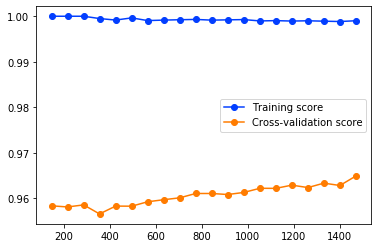

In [40]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X_train, y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)

train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)

plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Cross-validation score")
plt.legend();

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [42]:
print("==============================================")
print("For Random Forest Classifier:\n")
print("Accuracy Score: ",accuracy_score(y_test, y_pred))
print("Precision Score: ",precision_score(y_test, y_pred))
print("Recall Score: ",recall_score(y_test, y_pred))
print("F1 Score: ",f1_score(y_test, y_pred))
print("Confusion Matrix:\t \n",confusion_matrix(y_test, y_pred))

print("==============================================")

For Random Forest Classifier:

Accuracy Score:  0.9216931216931217
Precision Score:  0.9284940411700975
Recall Score:  0.9907514450867052
F1 Score:  0.9586129753914988
Confusion Matrix:	 
 [[ 14  66]
 [  8 857]]


#### Gradient Boosting Classifier:

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

print("==============================================")
print("For Gradient Boosting Classifier:\n")
print("Accuracy Score: ",accuracy_score(y_test, y_pred))
print("Precision Score: ",precision_score(y_test, y_pred))
print("Recall Score: ",recall_score(y_test, y_pred))
print("F1 Score: ",f1_score(y_test, y_pred))
print("Confusion Matrix:\t \n",confusion_matrix(y_test, y_pred))
print("==============================================")

For Gradient Boosting Classifier:

Accuracy Score:  0.928042328042328
Precision Score:  0.9289558665231432
Recall Score:  0.9976878612716763
F1 Score:  0.9620958751393535
Confusion Matrix:	 
 [[ 14  66]
 [  2 863]]


### Conclusions:
- Feature Engineering is the most crucial step when it comes to Natural Language Processing.
- Switching the Count Vectorizer with a TDF IF Vectorizer also made a difference on the F1 score.



In [45]:
results = pd.DataFrame(data = {'Y Test': y_test, 'Y Predictions': y_pred})

In [46]:
results.head()

,Y Test,Y Predictions
124,1,1
2437,1,1
2111,1,1
1137,1,1
2568,1,1


In [47]:
results.to_csv('Results.csv')